In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
df = pd.read_csv("/home/intellect/Documents/Decision_Tree/pet_adoption_data.csv")
df

,pet_id,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [8]:
print(df.shape)
df.head()

(2007, 13)


,pet_id,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [9]:
df.drop(columns=['pet_id'], inplace=True)

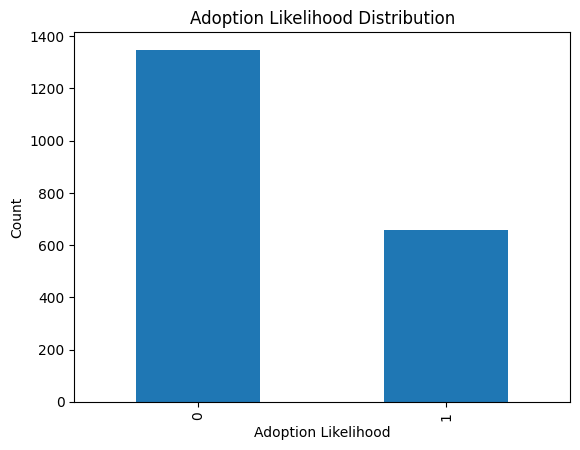

In [10]:
df['adoption_likelihood'].value_counts().plot(kind='bar')
plt.title("Adoption Likelihood Distribution")
plt.xlabel("Adoption Likelihood")
plt.ylabel("Count")
plt.show()

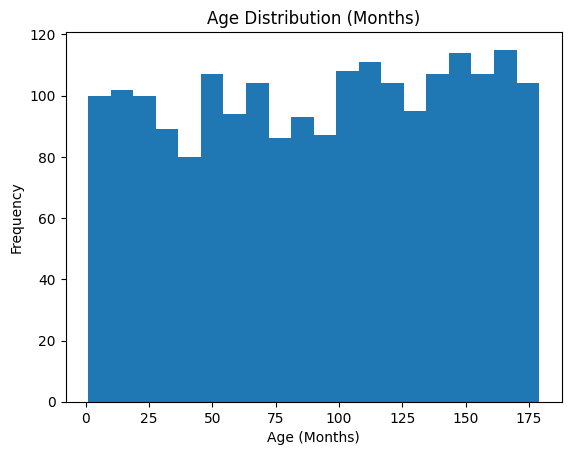

In [11]:
plt.hist(df['age_months'], bins=20)
plt.title("Age Distribution (Months)")
plt.xlabel("Age (Months)")
plt.ylabel("Frequency")
plt.show()

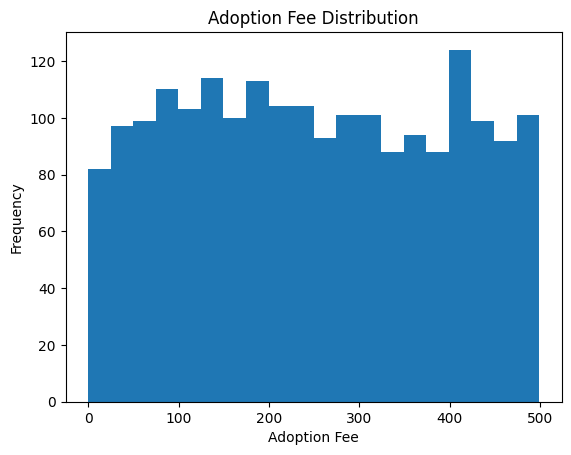

In [12]:
plt.hist(df['adoption_fee'], bins=20)
plt.title("Adoption Fee Distribution")
plt.xlabel("Adoption Fee")
plt.ylabel("Frequency")
plt.show()

In [13]:
df['size'] = df['size'].map({'Small': 1, 'Medium': 2, 'Large': 3})

In [14]:
df = pd.get_dummies(df, columns=['color', 'pet_type', 'breed'], drop_first=True)

In [15]:
df['weight_kg'] = MinMaxScaler().fit_transform(df[['weight_kg']])

In [16]:
df['adoption_fee'] = StandardScaler().fit_transform(df[['adoption_fee']])

In [17]:
X = df.drop('adoption_likelihood', axis=1)
y = df['adoption_likelihood']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [19]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8723051409618574
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       405
           1       0.81      0.80      0.81       198

    accuracy                           0.87       603
   macro avg       0.86      0.85      0.86       603
weighted avg       0.87      0.87      0.87       603



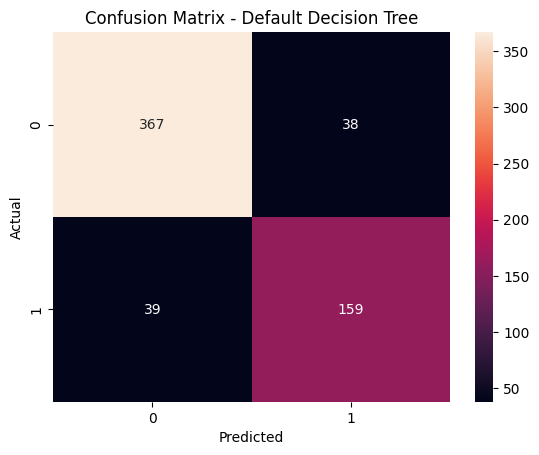

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Default Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

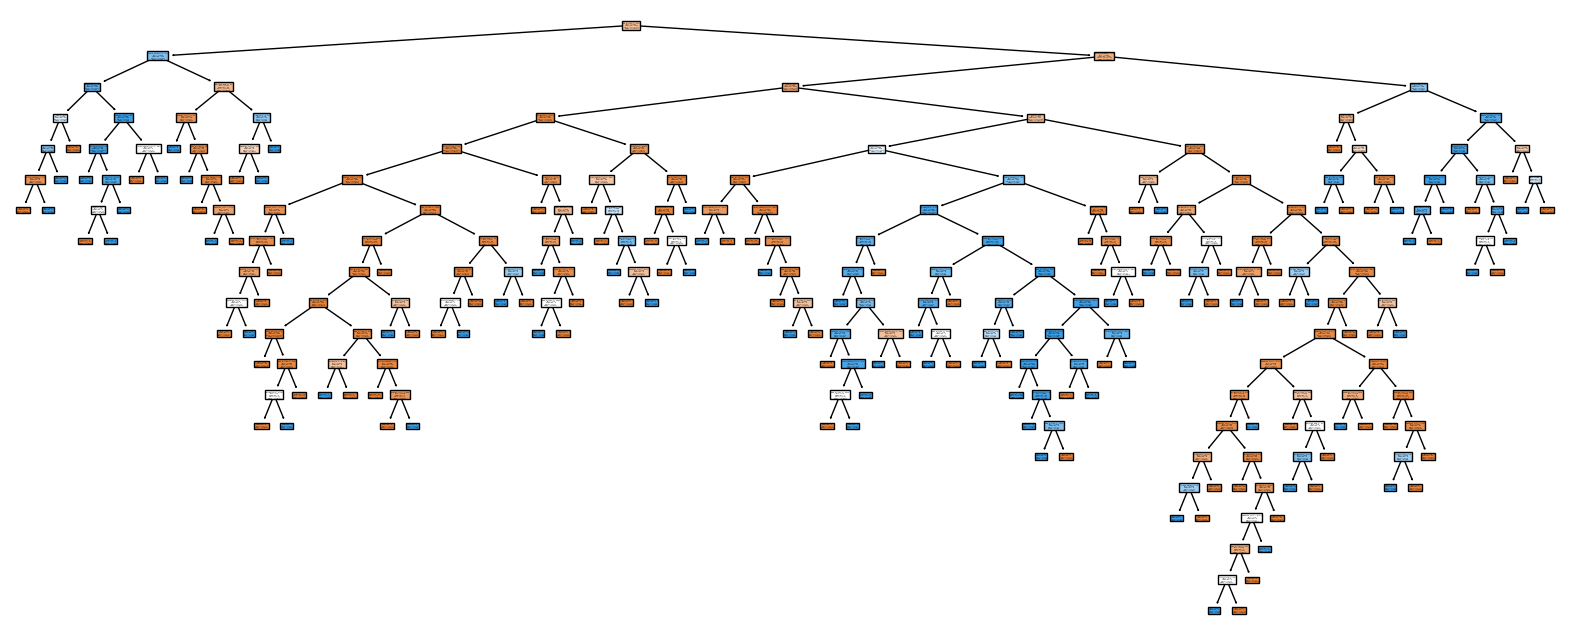

In [21]:
plt.figure(figsize=(20,8))
plot_tree(dt, feature_names=X.columns, class_names=['Unlikely', 'Likely'], filled=True)
plt.show()

In [22]:
dt_tuned = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_tuned.fit(X_train, y_train)

y_pred_tuned = dt_tuned.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

Tuned Accuracy: 0.8938640132669984
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       405
           1       0.81      0.88      0.84       198

    accuracy                           0.89       603
   macro avg       0.88      0.89      0.88       603
weighted avg       0.90      0.89      0.89       603



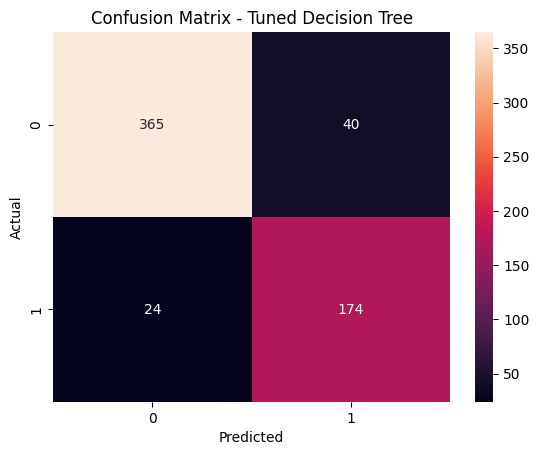

In [23]:
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d')
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

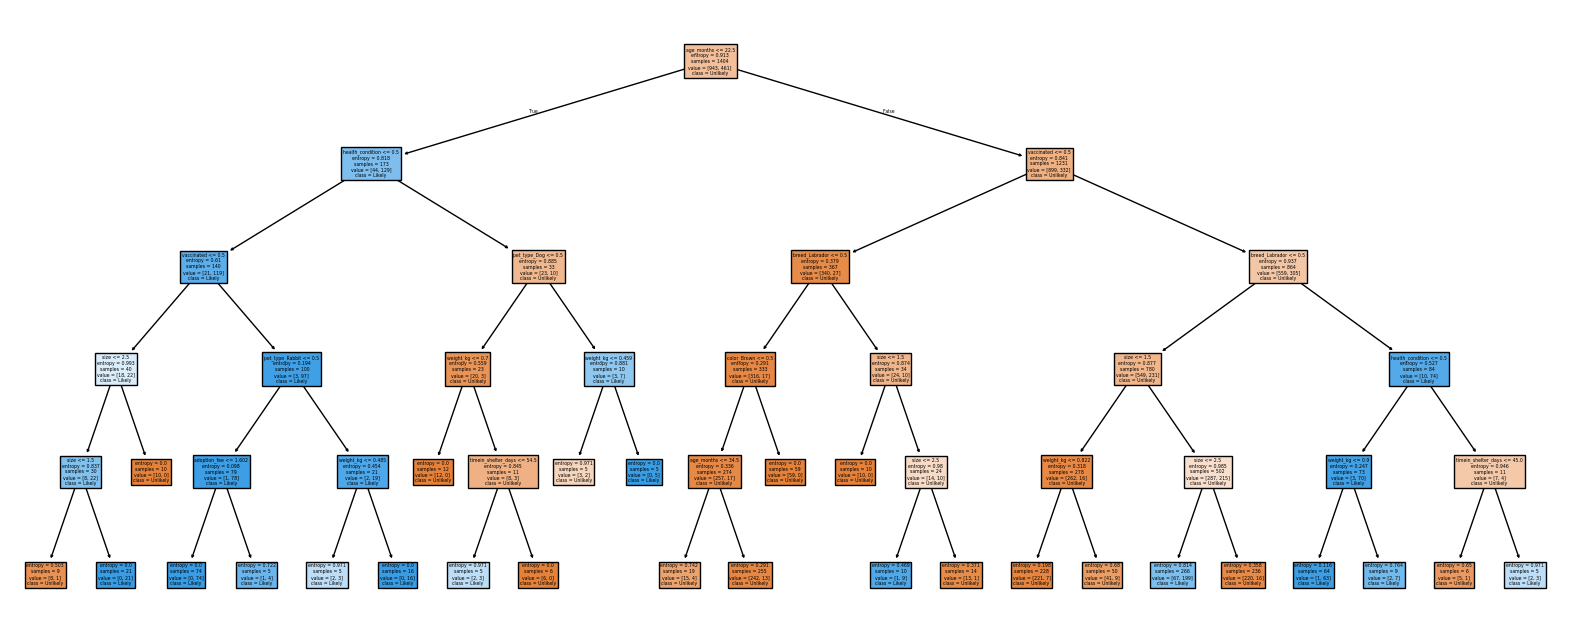

In [24]:
plt.figure(figsize=(20,8))
plot_tree(dt_tuned, feature_names=X.columns, class_names=['Unlikely', 'Likely'], filled=True)
plt.show()

In [26]:
import joblib

joblib.dump(dt, 'pet_adoption_model.pkl')
print("✅ Model saved successfully as pet_adoption_model.pkl")

✅ Model saved successfully as pet_adoption_model.pkl
